In [17]:
pip install pyspark


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB
None
                       name  year  selling_price  km_driven    fuel  \
0             Maruti 800 AC  2007          60000      70000  Petrol   
1  Maruti Wagon R LXI Minor  2007         135000      50000  Petrol   
2      Hyundai Verna 1.6 SX  2012         600000     100000  Diesel   
3    Datsun RediGO T Option  2017         250000      46000  Petrol   
4     Honda Amaze VX i-DTEC  2014         450000    

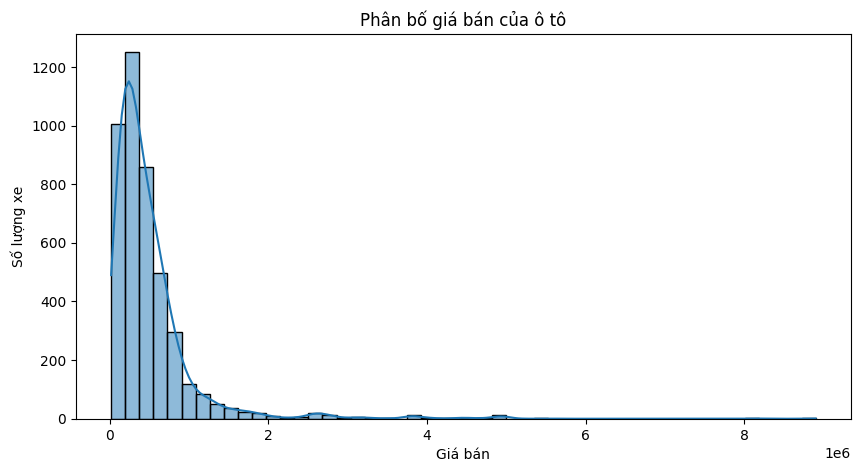

C:\Users\Admin\AppData\Local\Temp\ipykernel_12836\1262610234.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="fuel", order=df["fuel"].value_counts().index, palette="pastel")


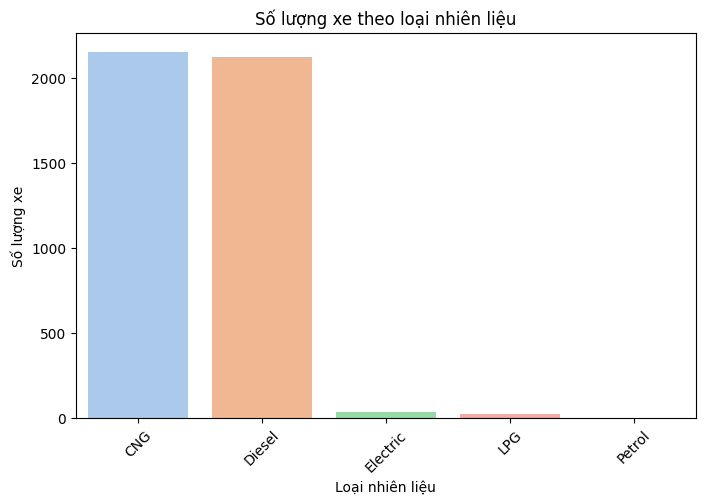

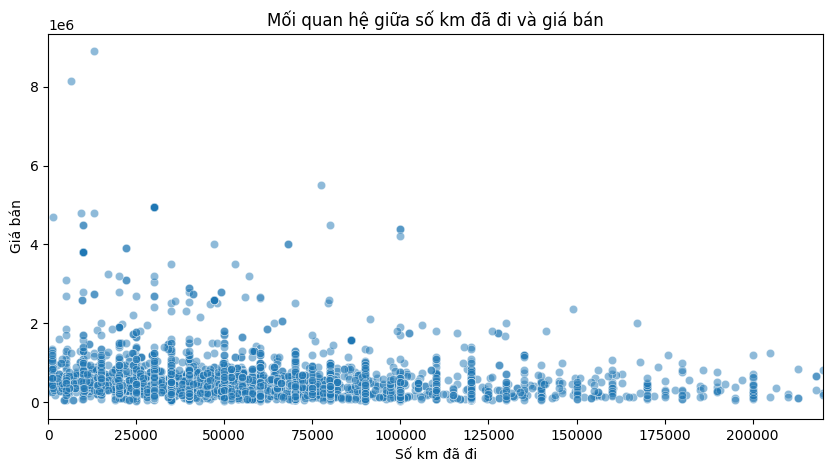

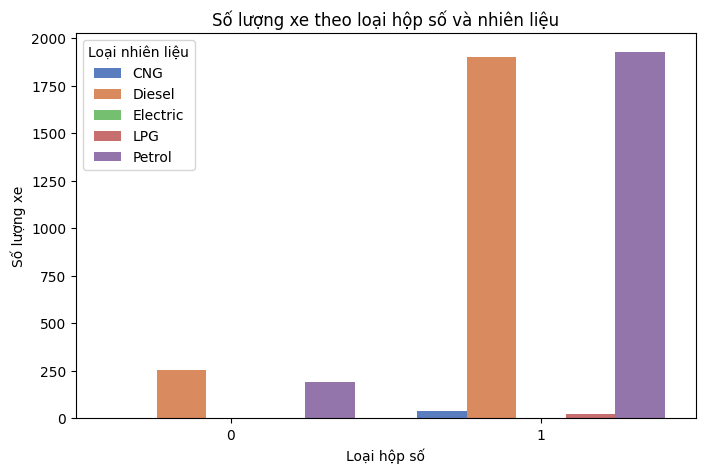

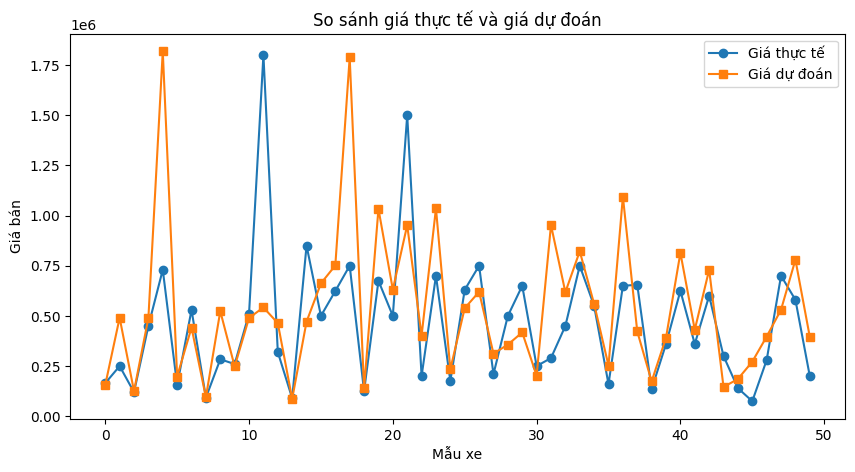

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Đọc dữ liệu từ file CSV (THAY ĐƯỜNG DẪN ĐÚNG CỦA BẠN)
file_path = r"CAR DETAILS FROM CAR DEKHO.csv"
df = pd.read_csv(file_path)

# Hiển thị thông tin tổng quan về dữ liệu
print(df.info())
print(df.head())

# Tiền xử lý dữ liệu
encoder = LabelEncoder()
fuel_mapping = dict()
for col in ['fuel', 'seller_type', 'transmission', 'owner']:
    df[col] = encoder.fit_transform(df[col])
    if col == 'fuel':
        fuel_mapping = dict(zip(range(len(encoder.classes_)), encoder.classes_))  # Lưu tên nhiên liệu

df = df.drop(columns=['name'])  

# Chia tập dữ liệu (80% train - 20% test)
X = df.drop(columns=['selling_price'])
y = df['selling_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Huấn luyện mô hình Random Forest Regressor để dự đóan xe
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Dự đoán và đánh giá mô hình
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

# Hiển thị 5 dự đoán đầu tiên
predictions = pd.DataFrame({'Actual Price': y_test.values, 'Predicted Price': y_pred})
print(predictions.head())

# Biểu đồ phân bố giá bán
plt.figure(figsize=(10, 5))
sns.histplot(df["selling_price"], bins=50, kde=True)
plt.xlabel("Giá bán")
plt.ylabel("Số lượng xe")
plt.title("Phân bố giá bán của ô tô")
plt.show()

# Biểu đồ số lượng xe theo loại nhiên liệu
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="fuel", order=df["fuel"].value_counts().index, palette="pastel")
plt.xlabel("Loại nhiên liệu")
plt.ylabel("Số lượng xe")
plt.title("Số lượng xe theo loại nhiên liệu")
plt.xticks(ticks=list(fuel_mapping.keys()), labels=list(fuel_mapping.values()), rotation=45)  # Hiển thị tên nhiên liệu
plt.show()

# Biểu đồ giá bán theo số km đã đi
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x="km_driven", y="selling_price", alpha=0.5)
plt.xlim(0, df["km_driven"].quantile(0.99))  # Giới hạn để loại bỏ outliers
plt.xlabel("Số km đã đi")
plt.ylabel("Giá bán")
plt.title("Mối quan hệ giữa số km đã đi và giá bán")
plt.show()

#  Biểu đồ số lượng xe theo loại hộp số và nhiên liệu
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="transmission", hue="fuel", palette="muted")
plt.xlabel("Loại hộp số")
plt.ylabel("Số lượng xe")
plt.title("Số lượng xe theo loại hộp số và nhiên liệu")
plt.legend(title="Loại nhiên liệu", labels=list(fuel_mapping.values()))
plt.show()

# Biểu đồ đường so sánh giá thực tế và giá dự đoán
plt.figure(figsize=(10, 5))
plt.plot(y_test.values[:50], label="Giá thực tế", marker='o')
plt.plot(y_pred[:50], label="Giá dự đoán", marker='s')
plt.xlabel("Mẫu xe")
plt.ylabel("Giá bán")
plt.title("So sánh giá thực tế và giá dự đoán")
plt.legend()
plt.show()
